# Create an empty data frame

In [2]:
import pandas as pd

In [14]:
def test_run():
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates = pd.date_range(start_date, end_date)
    
    # Create an empty dataframe
    df1 = pd.DataFrame(index=dates)
    
    # Read IBM data into a dataframe. Make sure we specify the indes column
    # since that's what we used above
    df_ibm = pd.read_csv(
        'data/IBM.csv', 
        index_col="Date", 
        parse_dates=True,
        usecols=['Date', 'Adj Close'],
        na_values=['nan'], 
    )
    
    # Join the two dataframes
    df1 = df1.join(df_ibm, how='inner')
    
    print df1
    

test_run()

            Adj Close
2010-01-22     119.61
2010-01-25     120.20
2010-01-26     119.85


# Read in more stocks

In [15]:
start_date = '2010-01-22'
end_date = '2010-01-26'
dates = pd.date_range(start_date, end_date)
    
# Create an empty dataframe
df1 = pd.DataFrame(index=dates)

# Read in multiple symbols
symbols = ['IBM', 'AAPL']

for symbol in symbols:

    df_temp = pd.read_csv(
        'data/{}.csv'.format(symbol),
        index_col="Date", 
        parse_dates=True,
        usecols=['Date', 'Adj Close'],
        na_values=['nan'], 
    )
    
    # Rename to prevent clash
    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    
    # Join the two dataframes
    df1 = df1.join(df_temp, how='left')

print df1.head()

               IBM    AAPL
2010-01-22  119.61  196.90
2010-01-23     NaN     NaN
2010-01-24     NaN     NaN
2010-01-25  120.20  202.20
2010-01-26  119.85  205.06


# Utility functions for reading data

In [16]:
import os
import pandas as pd

In [33]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        
        # Read in the data
        df_temp = pd.read_csv(
            symbol_to_path(symbol), 
            index_col="Date", 
            parse_dates=True, 
            usecols=['Date', 'Adj Close'],
            na_values=['nan'],
        )
    
        # Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        
        # Join the dataframes
        df = df.join(df_temp)
        
        # Drop any rows where SPY is NaN
        df = df.dropna(subset=['SPY'])

    return df

In [34]:
def test_run():

    # Define a date range
    dates = pd.date_range('2010-01-22', '2010-01-26')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    print df

test_run()

               SPY    GOOG     IBM     GLD
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56


# More Slicing

In [37]:
dates = pd.date_range('2010-01-22', '2010-12-31')
symbols = ['GOOG', 'IBM', 'GLD']
df = get_data(symbols, dates)
print df.head()

               SPY    GOOG     IBM     GLD
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56
2010-01-27  104.93  542.10  120.40  106.53
2010-01-28  103.73  534.29  117.94  106.48


Slice by row:

In [39]:
print df.loc['2010-01-01': '2010-01-31']

               SPY    GOOG     IBM     GLD
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56
2010-01-27  104.93  542.10  120.40  106.53
2010-01-28  103.73  534.29  117.94  106.48
2010-01-29  102.60  529.94  116.65  105.96


Slice by column:

In [40]:
print df['GOOG'].head()

2010-01-22    550.01
2010-01-25    540.00
2010-01-26    542.42
2010-01-27    542.10
2010-01-28    534.29
Name: GOOG, dtype: float64


In [41]:
print df[['IBM', 'GLD']].head()

               IBM     GLD
2010-01-22  119.61  107.17
2010-01-25  120.20  107.48
2010-01-26  119.85  107.56
2010-01-27  120.40  106.53
2010-01-28  117.94  106.48


Slice by row and column:

In [43]:
print df.loc['2010-01-01': '2010-01-31', ['SPY', 'IBM']].head()

               SPY     IBM
2010-01-22  104.34  119.61
2010-01-25  104.87  120.20
2010-01-26  104.43  119.85
2010-01-27  104.93  120.40
2010-01-28  103.73  117.94


# Slice and plot two stocks

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    df.loc[start_index: end_index, columns].plot()
    plt.show()
    
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

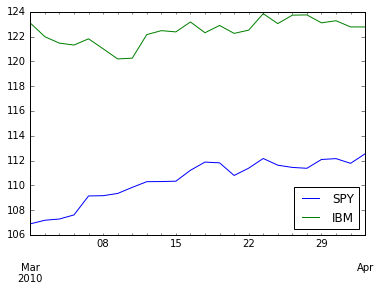

In [49]:
def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)

    # Slice and plot
    plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')

test_run()

# Normalizing

In [51]:
def normalize_data(df):
    return df / df[0]